In [2]:
%matplotlib notebook
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

params = {
    'lines.linewidth': 3,
    'axes.labelsize': 16,
    'font.size': 16,
    'legend.fontsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'text.usetex': False,
    'figure.figsize': [8,6],
    'text.usetex': True,
    'text.latex.unicode': True,
    'text.latex.preamble': ['\\usepackage{siunitx}']
   }

mpl.rcParams.update(params)

## Problem 1

This question serves to test their qualitative understanding of the frequency response and Bode plots.
The frequency response of two systems are shown, the students should answer some questions based on the plots and their shapes. 
This combines their understanding of the Bode plot approximations and it's relationship to the true frequency responses.


<IPython.core.display.Javascript object>


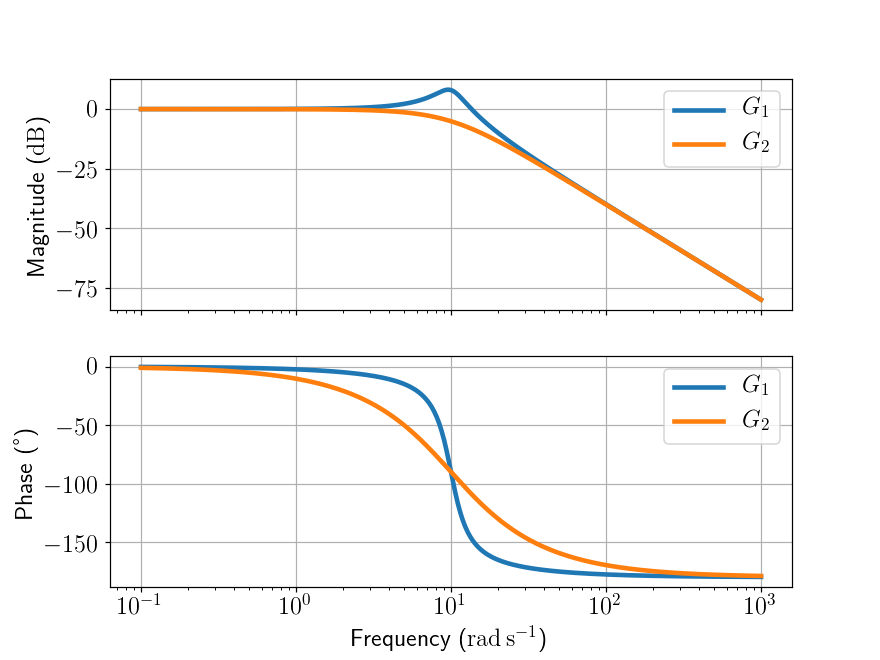

In [20]:
# define two systems

G1 = signal.TransferFunction([100],[1, 2*0.2*10, 100])
G2 = signal.TransferFunction([100], [1, 2*0.9*10, 100])

freq = np.logspace(-1, 3, 500)
# generate and plot their frequency responses
w1, mag1, phase1 = signal.bode(G1, freq)
w2, mag2, phase2 = signal.bode(G2, freq)

fig, axarr=plt.subplots(2,1, figsize=(8,6), sharex=True)
axarr[0].semilogx(w1,mag1, label=r'$G_1$')
axarr[0].semilogx(w2, mag2, label=r'$G_2$')

axarr[0].set_ylabel(r'Magnitude (\si{\decibel})')
axarr[0].legend([r'$G_1$', r'$G_2$'])
axarr[0].grid(True)

axarr[1].semilogx(w1, phase1, label=r'$G_1$')
axarr[1].semilogx(w2, phase2, label=r'$G_2$')

axarr[1].set_xlabel(br'Frequency (\si{\radian\per\second})')
axarr[1].set_ylabel(r'Phase (\si{\degree})')
axarr[1].legend([r'$G_1$', r'$G_2$'])
axarr[1].grid(True)

# plt.savefig('prob1_bode.eps')
plt.show()


## Another problem

This problem gives several transfer functions and the students should match them to their frequency response plots. 
This tests the ability to use the bode approximations without actually forcing them to draw the plots.



<IPython.core.display.Javascript object>


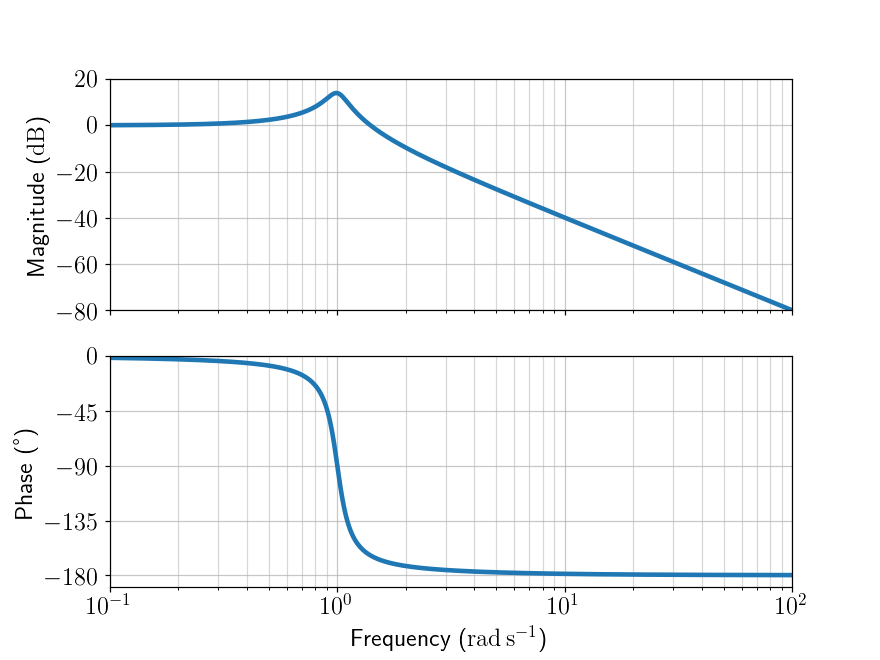

In [34]:
# Define a bunch transfer functions and plot their frequency response

G1 = signal.TransferFunction([1],[1, 0.2, 1])
G2 = signal.TransferFunction([2, 4], [1, 0.5, 4])
G3 = signal.TransferFunction([-2, 4], [1, 0.5, 4])

freq = np.logspace(-1, 2, 500)
# generate and plot their frequency responses
w1, mag1, phase1 = signal.bode(G1, freq)
w2, mag2, phase2 = signal.bode(G2, freq)
w3, mag3, phase3 = signal.bode(G3, freq)

# first transfer function
fig1, axarr1=plt.subplots(2,1, figsize=(8,6), sharex=True)
axarr1[0].semilogx(w1,mag1, label=r'$G_1$')
axarr1[0].set_ylabel(r'Magnitude (\si{\decibel})')
axarr1[0].grid(which='minor', alpha=0.5)                                                
axarr1[0].grid(which='major', alpha=0.7)
axarr1[0].set_xlim([0.1, 100])
axarr1[0].set_ylim([-80,20])
axarr1[0].set_yticks(np.arange(-80,21,20))

axarr1[1].semilogx(w1, phase1, label=r'$G_1$')
axarr1[1].set_xlabel(r'Frequency (\si{\radian\per\second})')
axarr1[1].set_ylabel(r'Phase (\si{\degree})')
axarr1[1].grid(which='minor', alpha=0.5)                                                
axarr1[1].grid(which='major', alpha=0.7)
axarr1[1].set_ylim([-190, 0])
axarr1[1].set_yticks(np.arange(-180, 1, 45))

# plt.savefig('G1.eps')
plt.show()

<IPython.core.display.Javascript object>


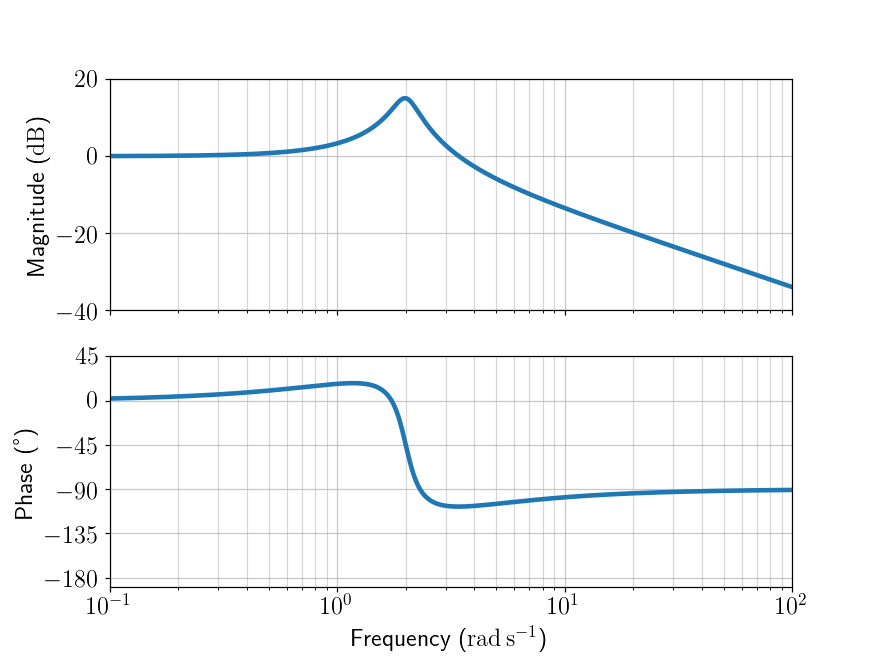

In [35]:
# second transfer function
fig2, axarr2=plt.subplots(2,1, figsize=(8,6), sharex=True)
axarr2[0].semilogx(w2,mag2)
axarr2[0].set_ylabel(r'Magnitude (\si{\decibel})')
axarr2[0].grid(which='minor', alpha=0.5)                                                
axarr2[0].grid(which='major', alpha=0.7)
axarr2[0].set_xlim([0.1, 100])
axarr2[0].set_ylim([-40,20])
axarr2[0].set_yticks(np.arange(-40,21,20))

axarr2[1].semilogx(w2, phase2)
axarr2[1].set_xlabel(r'Frequency (\si{\radian\per\second})')
axarr2[1].set_ylabel(r'Phase (\si{\degree})')
axarr2[1].grid(which='minor', alpha=0.5)                                                
axarr2[1].grid(which='major', alpha=0.7)
axarr2[1].set_ylim([-190, 45])
axarr2[1].set_yticks(np.arange(-180, 46, 45))

# plt.savefig('G2.eps')
plt.show()

<IPython.core.display.Javascript object>


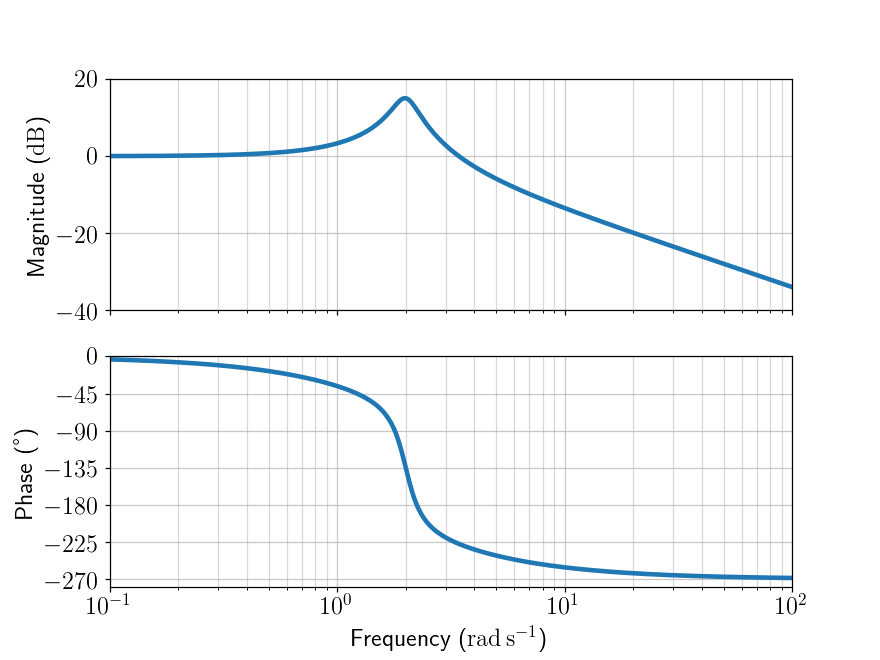

In [36]:
# third transfer function
fig3, axarr3=plt.subplots(2,1, figsize=(8,6), sharex=True)
axarr3[0].semilogx(w3,mag3)
axarr3[0].set_ylabel(r'Magnitude (\si{\decibel})')
axarr3[0].grid(which='minor', alpha=0.5)                                                
axarr3[0].grid(which='major', alpha=0.7)
axarr3[0].set_xlim([0.1, 100])
axarr3[0].set_ylim([-40,20])
axarr3[0].set_yticks(np.arange(-40,21,20))

axarr3[1].semilogx(w3, phase3)
axarr3[1].set_xlabel(r'Frequency (\si{\radian\per\second})')
axarr3[1].set_ylabel(r'Phase (\si{\degree})')
axarr3[1].grid(which='minor', alpha=0.5)                                                
axarr3[1].grid(which='major', alpha=0.7)
axarr3[1].set_ylim([-280, 0])
axarr3[1].set_yticks(np.arange(-270, 1, 45))

# plt.savefig('G3.eps')
plt.show()